In [ ]:
datasetPath = '/content/drive/MyDrive/datatset'
parameterPath = '/content/drive/MyDrive/parameters'

---
# 패키지 선언
---

In [ ]:
import torch
import torch.nn as nn
import torchvision.datasets as dataset
import torchvision.transforms as transform
from torch.utils.data import DataLoader

In [ ]:
#Training dataset 다운로드
mnist_train = dataset.MNIST(root = datasetPath, # 데이터셋을 저장할 위치
                            train = True,
                            transform = transform.ToTensor(),
                            download = True)
# Testing dataset 다운로드
mnist_test = dataset.MNIST(root = datasetPath,
                           train = False,
                           transform = transform.ToTensor(),
                           download = True)

60000
torch.Size([1, 28, 28])
5


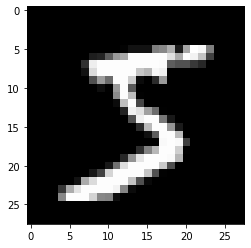

In [ ]:
import matplotlib.pyplot as plt
print(len(mnist_train))         # training dataset 개수 확인

first_data = mnist_train[0]
print(first_data[0].shape)      # 첫번째 data의 형상 확인
print(first_data[1])            # 첫번째 data의 정답 확인

plt.imshow(first_data[0][0,:,:], cmap = 'gray')
plt.show()

In [ ]:
first_img = first_data[0]
print(first_img.shape)

first_img = first_img.view(-1, 28*28)
print(first_img.shape)

torch.Size([1, 28, 28])
torch.Size([1, 784])

torch.Size([1, 28, 28])
torch.Size([1, 784])


torch.Size([1, 784])

In [ ]:
class SLP(nn.Module):
  def __init__(self):
    super(SLP, self).__init__()
    #SLP의 입력은 784개, 출력은 10개
    self.fc = nn.Linear(in_features=784, out_features = 10)

  def forward(self, x):
    x = x.view(-1, 28*28) # 이미지 평탕화
    y = self.fc(x)
    return y

In [ ]:
batch_size = 100
learning_rate = 0.1
training_epochs = 15
loss_function  = nn.CrossEntropyLoss()
network = SLP()
optimizer = torch.optim.SGD(network.parameters(), lr = learning_rate)

data_loader = DataLoader(dataset = mnist_train,
                         batch_size = batch_size,
                         shuffle=True,
                         drop_last=True)



---

###모델 학습
---

In [ ]:
for epoch in range(training_epochs):
  avg_cost = 0
  total_batch = len(data_loader)

  for img, label in data_loader:

    pred = network(img)

    loss = loss_function(pred, label)
    optimizer.zero_grad()   #gradient 초기화
    loss.backward()
    optimizer.step()

    avg_cost += loss/total_batch

    print('Epoch: %d Loss = %f'%(epoch+1, avg_cost))

  print('Learning finished')

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Epoch: 7 Loss = 0.199623
Epoch: 7 Loss = 0.200123
Epoch: 7 Loss = 0.200567
Epoch: 7 Loss = 0.201004
Epoch: 7 Loss = 0.201844
Epoch: 7 Loss = 0.202238
Epoch: 7 Loss = 0.202965
Epoch: 7 Loss = 0.203606
Epoch: 7 Loss = 0.204120
Epoch: 7 Loss = 0.204694
Epoch: 7 Loss = 0.205176
Epoch: 7 Loss = 0.205675
Epoch: 7 Loss = 0.205956
Epoch: 7 Loss = 0.206465
Epoch: 7 Loss = 0.206860
Epoch: 7 Loss = 0.207231
Epoch: 7 Loss = 0.207575
Epoch: 7 Loss = 0.207935
Epoch: 7 Loss = 0.208643
Epoch: 7 Loss = 0.209236
Epoch: 7 Loss = 0.209888
Epoch: 7 Loss = 0.210635
Epoch: 7 Loss = 0.210855
Epoch: 7 Loss = 0.211315
Epoch: 7 Loss = 0.211688
Epoch: 7 Loss = 0.212145
Epoch: 7 Loss = 0.212655
Epoch: 7 Loss = 0.213224
Epoch: 7 Loss = 0.213630
Epoch: 7 Loss = 0.214212
Epoch: 7 Loss = 0.214659
Epoch: 7 Loss = 0.214976
Epoch: 7 Loss = 0.215657
Epoch: 7 Loss = 0.216176
Epoch: 7 Loss = 0.216579
Epoch: 7 Loss = 0.216888
Epoch: 7 Loss = 0.217402
Epoch: 7 Loss = 0.217990
Epoch: 7 Loss 

In [ ]:
torch.save(network.state_dict(), parameterPath+"slp_mnist.pth")

In [ ]:
new_network = SLP()
new_network.load_state_dict(torch.load(parameterPath+"slp_mnist.pth"))


<All keys matched successfully>

In [ ]:
with torch.no_grad():

  img_test = mnist_test.data.float()
  label_test = mnist_test.targets

  prediction = network(img_test)    # 전체 test data를 한번에 계산

  correct_prediction = torch.argmax(prediction, 1) == label_test
  accuracy = correct_prediction.float().mean()
  print("Accuracy: ", accuracy.item())

Accuracy:  0.8863000273704529
